High Demand:
1. Colgate Optic White Toothpaste 100g
2. Colgate Sensitive Pro Relief Toothpaste (110g/114g)
3. Daia Smart Concentrated Liquid Detergent Refill 1.7kg
4. Daia Softener Refill 900ml
5. Softlan Fabric Softener Refill Pack 1.4L

Low Demand:
1. Colgate Maximum Cavity Protection Toothpaste 225G x 2's
2. Colgate Plax Mouthwash Valuepack 750ml x 2
3. Colgate Triple Action Original Mint 175g (Value Pack of 2)
4. Daia Softener Refill Pack 1.8L/1.6L
5. Daia Washing Power Powder [2.2KG / 2.3KG/2.4KG]
6. Dettol Hand Wash (250ml) - Skincare
7. Dettol Hand Wash Skincare Pouch (225ml) Dettol Sakura Refill
8. F&N Sweetened & Condensed Filled Milk (500g)
9. Garbage Bag Plastik Sampah Size S/M/L/XL
10. Garnier Color Naturals Ultra Color Hair Dye Colour 30g
11. Life Tomato Sauce 485g
12. Mee Sedap Asli / Mi Sedaap Perisa Asli (5PCS x 90G)
13. OPP Tape Transparent 48mm x 80y Premium Grade
14. Quaker Oats - Whole Rolled Oats 800g
15. Rejoice Rich Soft Smooth Shampoo (600ml)
16. Tracia Lighteni

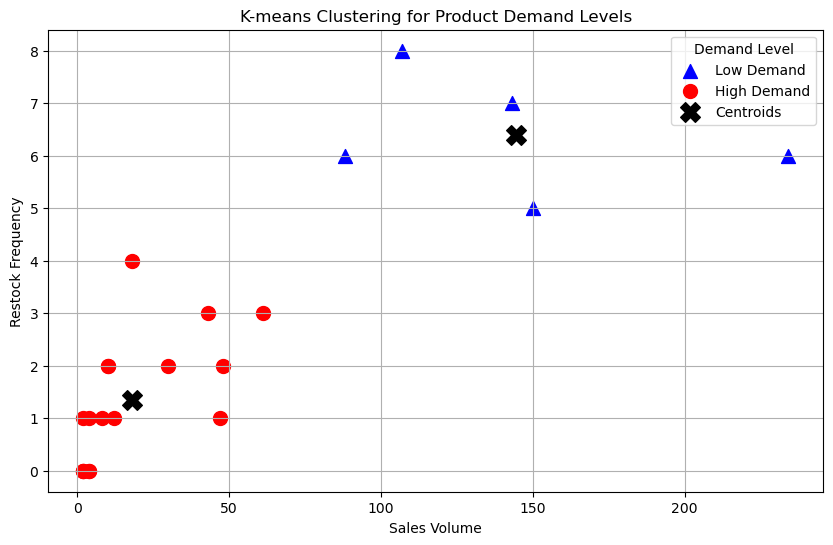

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the data from the CSV file
file_path = '22_product_quantities_random_restock_limited_no_stock.csv'
product_data = pd.read_csv(file_path)

# Calculate stock volume (sales quantity) and restock frequency for each product
sales_volumes = []
restock_frequencies = []

# Loop through each product to calculate sales volume and restock frequency
for _, row in product_data.iterrows():
    # Calculate daily changes in stock levels
    daily_changes = pd.to_numeric(row[1:].diff(), errors='coerce').fillna(0)
    
    # Sales volume: Sum of all decreases in stock levels (sales)
    sales_volume = -daily_changes[daily_changes < 0].sum()
    sales_volumes.append(sales_volume)
    
    # Restock frequency: Count of all increases in stock levels (restocks)
    restock_frequency = (daily_changes > 0).sum()
    restock_frequencies.append(restock_frequency)

# Add calculated features to the product data
product_data['Sales_Volume'] = sales_volumes
product_data['Restock_Frequency'] = restock_frequencies

# Prepare the data for clustering
X = product_data[['Sales_Volume', 'Restock_Frequency']].values

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Determine which cluster represents High Demand based on Sales Volume
high_demand_cluster = product_data.groupby(y_kmeans)['Sales_Volume'].mean().idxmax()

# Classify products into High Demand or Low Demand
high_demand_products = product_data[y_kmeans == high_demand_cluster]['Product'].tolist()
low_demand_products = product_data[y_kmeans != high_demand_cluster]['Product'].tolist()

# Display the classification results
print("High Demand:")
for i, product in enumerate(high_demand_products, start=1):
    print(f"{i}. {product}")

print("\nLow Demand:")
for i, product in enumerate(low_demand_products, start=1):
    print(f"{i}. {product}")

# Plotting the data points and cluster centers on raw data
plt.figure(figsize=(10, 6))

# Define colors and labels for each demand category
colors = ['blue', 'red']  # Low Demand in blue, High Demand in red
labels = ["Low Demand", "High Demand"]

# Plot each demand category with specific markers
for i in range(2):
    points = X[y_kmeans == i]
    plt.scatter(points[:, 0], points[:, 1], color=colors[i], s=100, marker='o' if i != high_demand_cluster else '^', label=labels[i])

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], color='black', s=200, marker='X', label="Centroids")

# Adding labels and legend
plt.xlabel("Sales Volume")
plt.ylabel("Restock Frequency")
plt.title("K-means Clustering for Product Demand Levels")
plt.legend(loc="upper right", title="Demand Level")
plt.grid(True)
plt.show()
